# Bivariate: Categorical vs Categorical

In [2]:
require(tidyverse)

In [4]:
nhanes <- read_csv('Datasets/nhanes.csv')

In [5]:
nhanes %>% 
    mutate(Education = Education %>%fct_relevel('8th Grade', '9 - 11th Grade', 'High School', 'Some College', 'College Grad')) -> nhanes

In [6]:
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='keep') %>% 
    pivot_wider(id_cols = 'Race1', names_from = 'Education', values_from = 'Frequency')

Race1,8th Grade,9 - 11th Grade,High School,Some College,College Grad
<chr>,<int>,<int>,<int>,<int>,<int>
Black,124,483,688,864,414
Hispanic,248,216,237,320,186
Mexican,618,329,308,305,116
Other,118,105,189,327,552
White,213,654,1173,1583,1388


In [7]:
#Raw percentages
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='drop') %>% 
    mutate(Percentage = round(Frequency*100/sum(Frequency), 2)) %>% 
    pivot_wider(id_cols = 'Race1', names_from = 'Education', values_from = 'Percentage') 

Race1,8th Grade,9 - 11th Grade,High School,Some College,College Grad
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Black,1.05,4.11,5.85,7.35,3.52
Hispanic,2.11,1.84,2.02,2.72,1.58
Mexican,5.26,2.80,2.62,2.59,0.99
Other,1.00,0.89,1.61,2.78,4.69
White,1.81,5.56,9.98,13.46,11.80


In [8]:
#groups by Race1 - Row percentages
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='drop_last') %>% 
    mutate(Percentage = round(Frequency*100/sum(Frequency), 2)) %>% 
    pivot_wider(id_cols = 'Race1', names_from = 'Education', values_from = 'Percentage') 

Race1,8th Grade,9 - 11th Grade,High School,Some College,College Grad
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Black,4.82,18.77,26.74,33.58,16.09
Hispanic,20.55,17.90,19.64,26.51,15.41
Mexican,36.87,19.63,18.38,18.20,6.92
Other,9.14,8.13,14.64,25.33,42.76
White,4.25,13.05,23.41,31.59,27.70


In [9]:
#Column percentages
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Education, Race1) %>% 
    summarise(Frequency = n(), .groups='drop_last') %>% 
    mutate(Percentage = round(Frequency*100/sum(Frequency), 2)) %>% 
    pivot_wider(id_cols = 'Race1', names_from = 'Education', values_from = 'Percentage') 

Race1,8th Grade,9 - 11th Grade,High School,Some College,College Grad
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Black,9.39,27.03,26.51,25.42,15.59
Hispanic,18.77,12.09,9.13,9.41,7.00
Mexican,46.78,18.41,11.87,8.97,4.37
Other,8.93,5.88,7.28,9.62,20.78
White,16.12,36.60,45.20,46.57,52.26


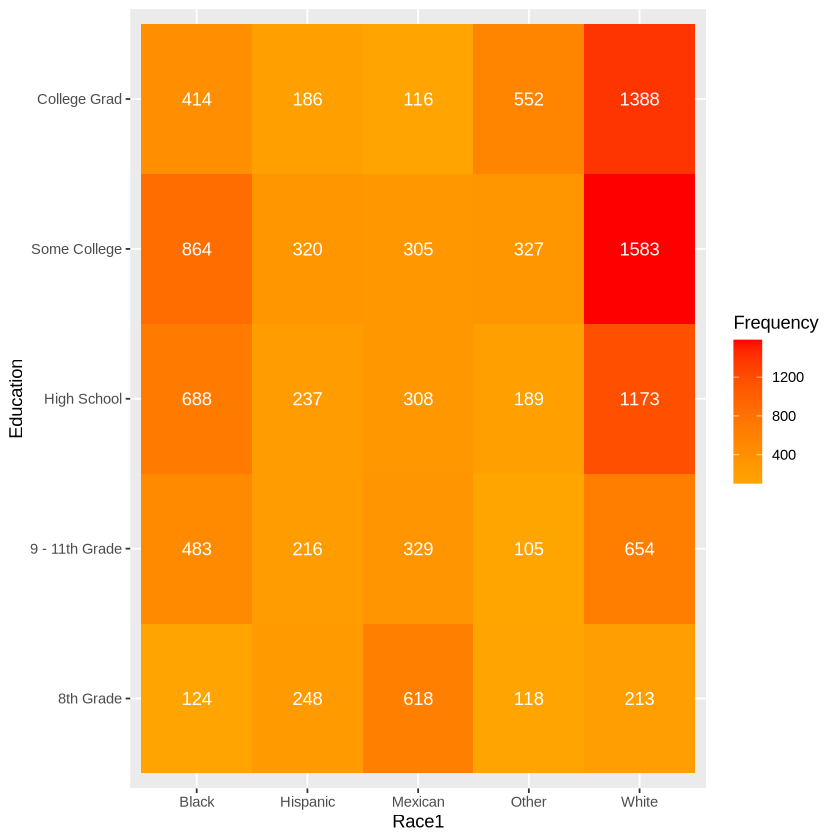

In [10]:
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='keep') %>% 
    ggplot(aes(x=Race1, y=Education, fill=Frequency, label=Frequency)) + 
        geom_tile() + 
        scale_fill_gradient(low='orange', high='red') + 
        geom_text(col='white')


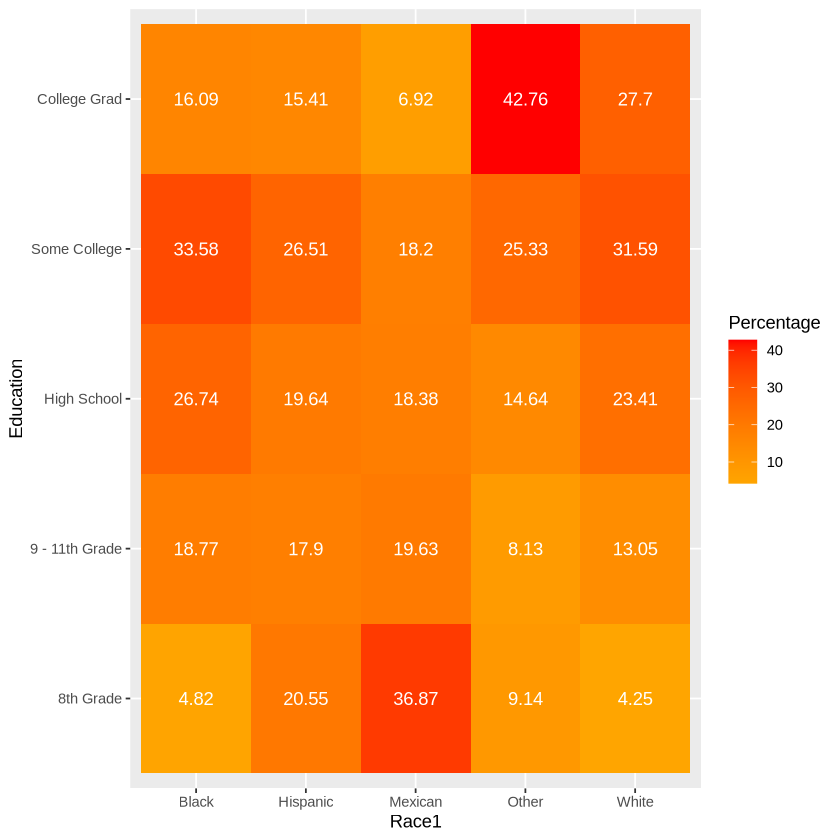

In [11]:
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='drop_last') %>% 
    mutate(Percentage = round(Frequency*100/sum(Frequency), 2)) %>% 
    ggplot(aes(x=Race1, y=Education, fill=Percentage, label=Percentage)) + 
        geom_tile() + 
        scale_fill_gradient(low='orange', high='red') + 
        geom_text(col='white')

In [12]:
# Bar charts

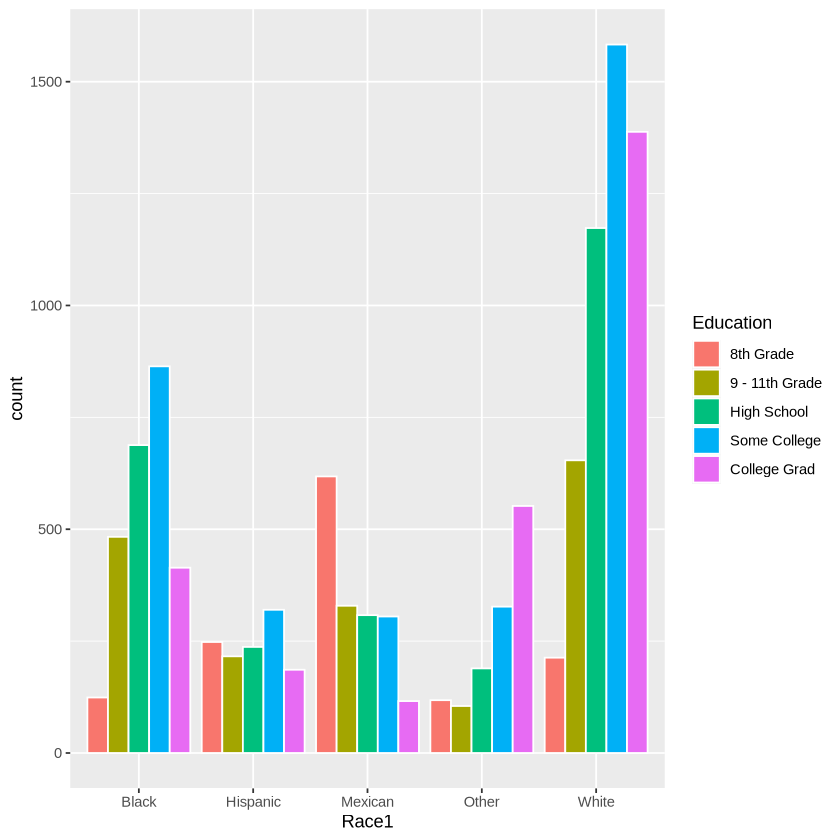

In [13]:
nhanes %>% 
    filter(!is.na(Education)) %>%
    ggplot() + 
        geom_bar(aes(x=Race1, fill=Education), position='dodge', col='white')


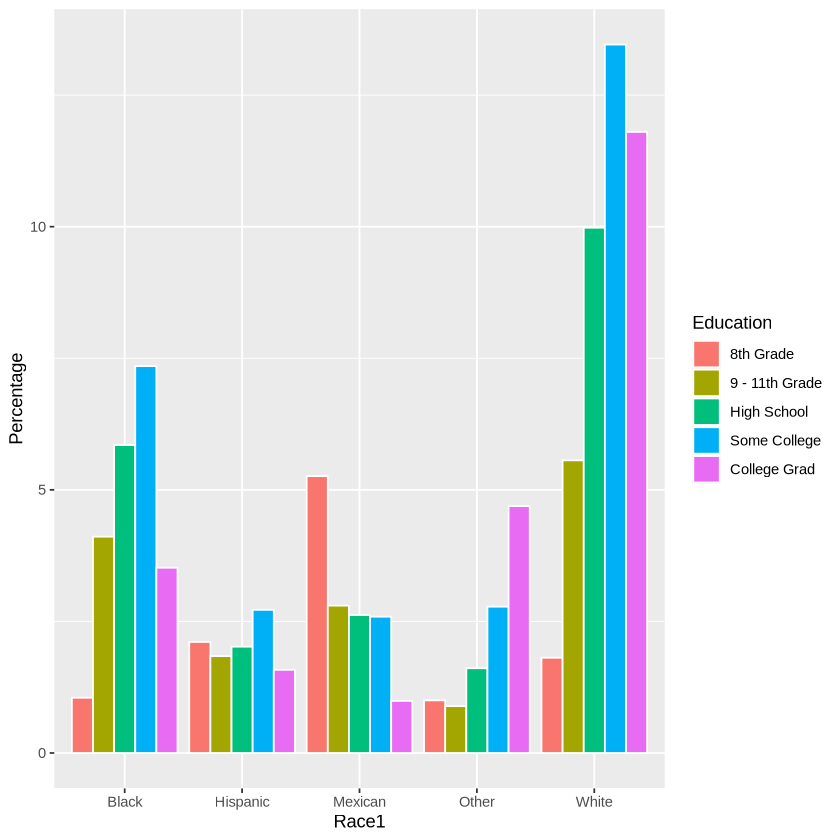

In [14]:
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='drop') %>%
    mutate(Percentage = round(Frequency*100/sum(Frequency), 2)) %>% 
    ggplot() + 
        geom_col(aes(x=Race1, y=Percentage, fill=Education), position='dodge', col='white')

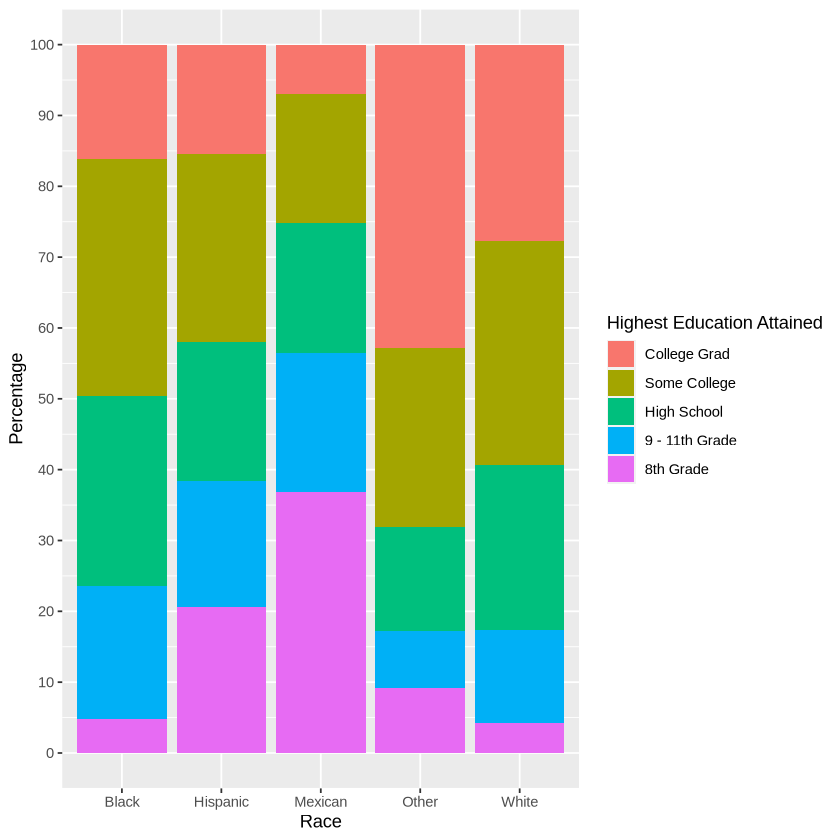

In [16]:
nhanes %>% 
    filter(!is.na(Education)) %>%
    group_by(Race1, Education) %>% 
    summarise(Frequency = n(), .groups='drop_last') %>%
    mutate(Percentage = round(Frequency*100/sum(Frequency), 2)) %>% 
    ggplot() + 
        geom_col(aes(x=Race1, y=Percentage, fill=fct_rev(Education))) + 
        labs(fill='Highest Education Attained', x='Race') + 
        scale_y_continuous(n.breaks=10)